# 데이터 다운로드

In [1]:
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz

--2024-11-20 09:08:11--  https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
snap.stanford.edu (snap.stanford.edu) 해석 중... 171.64.75.80
다음으로 연결 중: snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 9901821 (9.4M) [application/x-gzip]
저장 위치: ‘wikispeedia_paths-and-graph.tar.gz’

wikispeedia_paths-a 100%[===================>]   9.44M   528KB/s    / 24s      

2024-11-20 09:08:36 (407 KB/s) - ‘wikispeedia_paths-and-graph.tar.gz’ 저장함 [9901821/9901821]

wikispeedia_paths-and-graph/
wikispeedia_paths-and-graph/paths_finished.tsv
wikispeedia_paths-and-graph/paths_unfinished.tsv
wikispeedia_paths-and-graph/articles.tsv
wikispeedia_paths-and-graph/categories.tsv
wikispeedia_paths-and-graph/links.tsv
wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt


In [2]:
!head -n 20 wikispeedia_paths-and-graph/articles.tsv
!head -n 20 wikispeedia_paths-and-graph/links.tsv

# The list of all articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   article
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
%C3%85land
%C3%89douard_Manet
%C3%89ire
%C3%93engus_I_of_the_Picts
%E2%82%AC2_commemorative_coins
10th_century
11th_century
# The list of all links between articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   linkSource   linkTarget
#
# When publishing on this data set, please cite

In [4]:
import networkx as nx
from urllib.parse import unquote

G = nx.DiGraph()

with open("wikispeedia_paths-and-graph/articles.tsv") as f:
    for line in f:
        line = line.strip()
        if line == "" or line[0] == "#": 
           continue
        node = unquote(line)

    G.add_node(node)

with open("wikispeedia_paths-and-graph/links.tsv") as f:
    for line in f:
        line = line.strip()
        if line == "" or line[0] == "#": 
            continue

        u, v = line.split()
        u = unquote(u)
        v = unquote(v)
        G.add_edge(u, v)

In [5]:
len(G.nodes), len(G.edges)

(4592, 119882)

# Basic Statistics

In [10]:
n_nodes = len(G.nodes())
n_edges = len(G.edges)

n_triangles = sum(nx.triangles(G.to_undirected()).values()) // 3

density = n_edges * 2 / (n_nodes * (n_nodes-1))  # nx.density(G)


print("# nodes:", n_nodes)
print("# edges:", n_edges)
print("Density:", density)
print(nx.triangles(G.to_undirected()))
print("# triangles:", n_triangles)

# nodes: 4592
# edges: 119882
Density: 0.011372993821421552
{'Zulu': 96, 'Áedán_mac_Gabráin': 32, 'Bede': 96, 'Columba': 56, 'Dál_Riata': 111, 'Great_Britain': 1411, 'Ireland': 3202, 'Isle_of_Man': 535, 'Monarchy': 1578, 'Orkney': 232, 'Picts': 168, 'Scotland': 4289, 'Wales': 1193, 'Åland': 68, '20th_century': 3630, 'Baltic_Sea': 752, 'Crimean_War': 244, 'Currency': 6070, 'Euro': 1055, 'European_Union': 5610, 'Finland': 2335, 'League_of_Nations': 1399, 'List_of_countries_by_system_of_government': 5665, 'Nationality': 98, 'Parliamentary_system': 996, 'Police': 614, 'Russia': 9953, 'Stockholm': 185, 'Sweden': 4280, 'Time_zone': 6817, 'Tourism': 1382, 'United_Kingdom': 19818, 'World_War_II': 12655, 'Édouard_Manet': 50, 'Absinthe': 155, 'Beer': 420, 'Claude_Monet': 77, 'Diego_Velázquez': 185, 'Edgar_Allan_Poe': 290, 'France': 20880, 'Francisco_Goya': 29, 'Germany': 15831, 'Impressionism': 170, 'Italy': 9956, 'Landscape': 16, 'Netherlands': 7559, 'Painting': 608, 'Paris': 4456, 'Photography

# Centrality 계산

In [11]:
degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G,200)
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())

In [15]:
print("Deg Rank")
for line in sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("In-Deg Rank")
for line in sorted(indegree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("Out-Deg Rank")
for line in sorted(outdegree.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("Betweenness Rank")
for line in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

print("Page Rank")
for line in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(line)

Deg Rank
('United_States', 0.4018732302330647)
('United_Kingdom', 0.2483119146155522)
('Europe', 0.23785667610542366)
('France', 0.22740143759529516)
('England', 0.20104552385101285)
('Germany', 0.19864953169244173)
('World_War_II', 0.18950119799607928)
('English_language', 0.15595730777608366)
('India', 0.1507296885210194)
('London', 0.15007623611413637)
In-Deg Rank
('United_States', 0.3378348943585276)
('United_Kingdom', 0.2117185798301024)
('France', 0.20888695273360924)
('Europe', 0.20322369854062297)
('World_War_II', 0.163580919189719)
('England', 0.163580919189719)
('Germany', 0.16183837943803095)
('India', 0.13308647353517752)
('English_language', 0.13025484643868437)
('London', 0.12785885428011326)
Out-Deg Rank
('United_States', 0.06403833587453714)
('Driving_on_the_left_or_right', 0.055543454585057724)
('List_of_countries', 0.05314746242648661)
('List_of_circulating_currencies', 0.05140492267479852)
('List_of_sovereign_states', 0.04704857329557831)
('Africa', 0.046177303419734

In [16]:
nodes = G.nodes()
deg_arr = [degree[node] for node in nodes]
indeg_arr = [indegree[node] for node in nodes]
outdeg_arr = [outdegree[node] for node in nodes]
bw_arr = [betweenness[node] for node in nodes]
cl_arr = [closeness[node] for node in nodes]
pg_arr = [pagerank[node] for node in nodes]
cc_arr = [clustering[node] for node in nodes]
tr_arr = [triangles[node] for node in nodes]

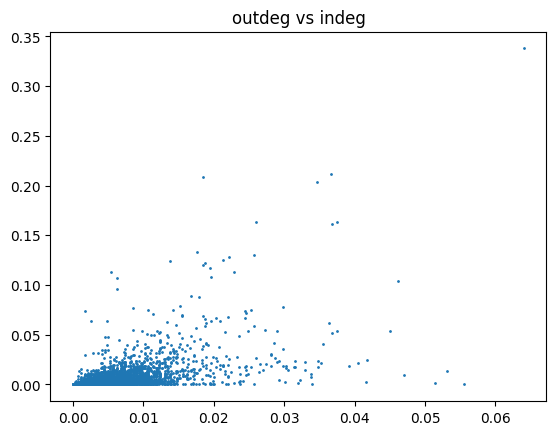

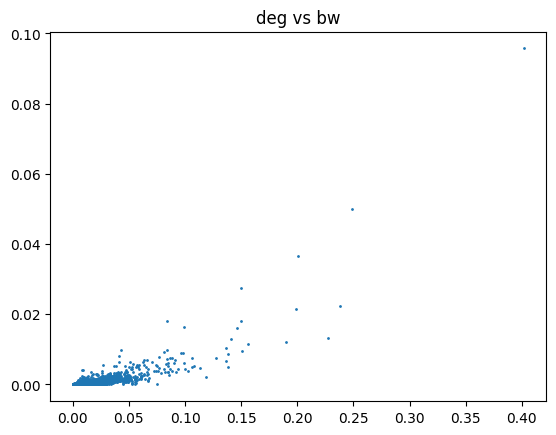

In [ ]:
import matplotlib.pyplot as plt

plt.title("outdeg vs indeg")
plt.scatter(outdeg_arr, indeg_arr, s=1)
plt.show()

plt.title("deg vs bw")
plt.scatter(deg_arr, bw_arr, s=1)
plt.show()

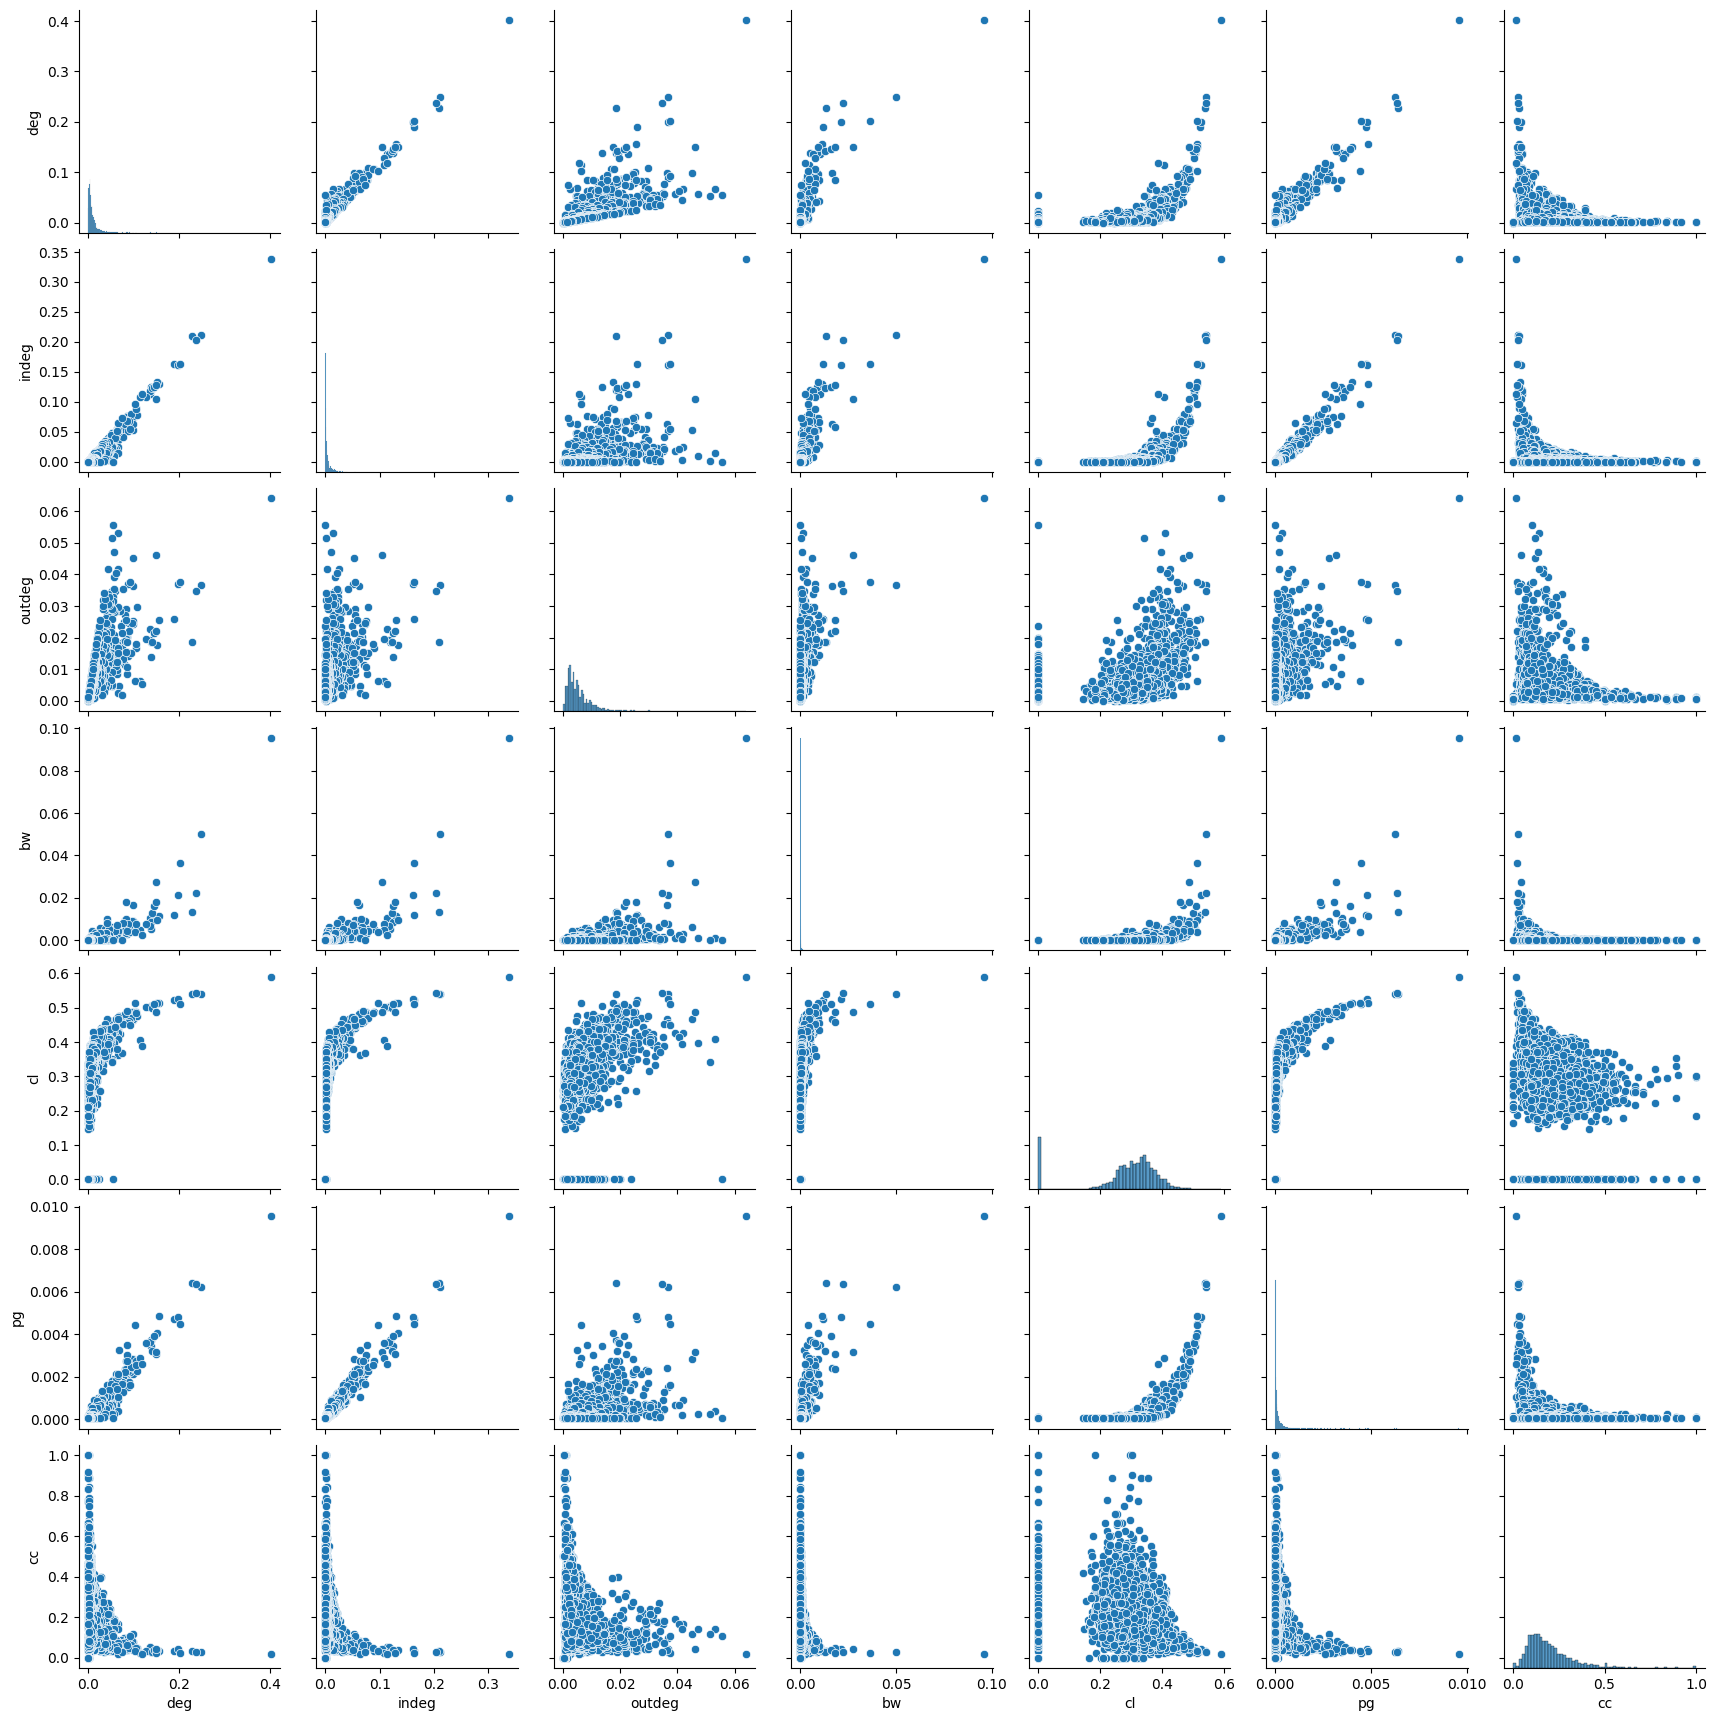

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np

a = np.array([deg_arr,indeg_arr,outdeg_arr,bw_arr,cl_arr,pg_arr,cc_arr]).T
df = pd.DataFrame(a, columns=["deg", "indeg", "outdeg", "bw", "cl", "pg", "cc"])
sns.pairplot(df)
plt.show()